In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
sns.set(style='darkgrid')

In [3]:
df = pd.read_csv('data/us_shootings.csv',parse_dates=['date'])

In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [5]:
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

Text(0, 0.5, 'Number')

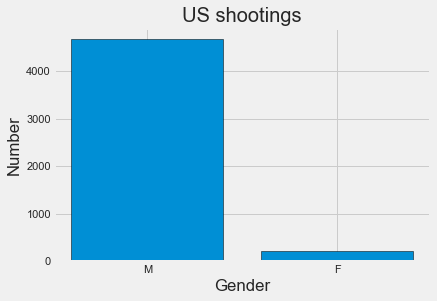

In [6]:
plt.style.use('fivethirtyeight')
count = df['gender'].value_counts()
gender = df['gender'].value_counts().index
plt.bar(gender,count, edgecolor='black')
plt.title("US shootings")
plt.xlabel("Gender")
plt.ylabel("Number")

## Are unarmed Black Americans targeted more? 

In [7]:
df1 = df[df['armed']=='unarmed']

In [8]:
df1.race.unique()

array(['Hispanic', 'White', 'Black', 'Native', 'Other', 'Asian'],
      dtype=object)

In [9]:
df1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
17,36,Artago Damon Howard,2015-01-08,shot,unarmed,36.0,M,Black,Strong,AR,False,attack,Not fleeing,False,Unarmed
61,352,Joshua Omar Garcia,2015-01-26,shot,unarmed,24.0,M,Hispanic,Tahoka,TX,False,other,Car,False,Unarmed
71,342,Ralph Willis,2015-01-29,shot,unarmed,42.0,M,White,Stillwater,OK,False,other,Foot,False,Unarmed


In [10]:
df1['race'] = ['Other' if i=='Native' or i=='Asian' else i for i in df1['race']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


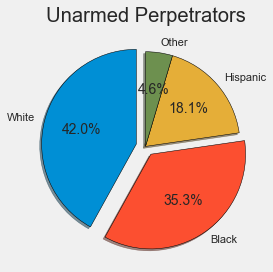

In [11]:
slices = df1['race'].value_counts()
labels = df1['race'].value_counts().index
explode = [0.1, 0.1, 0,0]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Unarmed Perpetrators")
plt.tight_layout()
plt.show()

In [12]:
df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
arms_category                      object
dtype: object

In [13]:
df.drop(columns = ['id','name'],inplace=True)

In [14]:
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [15]:
cols = df.columns.tolist()

In [16]:
cols = cols[-3:] + cols[:-1]

In [17]:
df = df[cols]

In [18]:
df.threat_level.value_counts()

attack          3160
other           1528
undetermined     207
Name: threat_level, dtype: int64

## What was the age of the youngest victim?

In [19]:
print('Youngest Victim Age-->',min(df['age']))
print('Oldest Perperator Age-->',max(df['age']))

Youngest Victim Age--> 6.0
Oldest Perperator Age--> 91.0


## Calculate the mean, median and mode age?

In [20]:
print('Average age -->', math.floor(df['age'].mean()))
print('Median age -->', math.floor(df['age'].median()))
print('Mode -->', math.floor(df['age'].mode()))

Average age --> 36
Median age --> 35
Mode --> 25


## To which city did the youngest victim belong to? What was his race?

In [21]:
City = df[df['age']==6]

In [22]:
City['city'].unique()

array(['Marksville', 'Schertz'], dtype=object)

In [23]:
City['race'].unique()

array(['White'], dtype=object)

## When was the oldest perperator killed?

In [24]:
Date =  df[df['age']==91]
Date['date'].unique()

array(['2017-03-08T00:00:00.000000000'], dtype='datetime64[ns]')

## Draw a Histogram to show the frequency distribution of age.

Text(0.5, 1.0, 'Suspects Age based Visual')

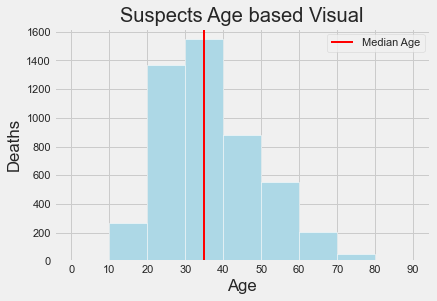

In [25]:
plt.hist(df['age'], bins = range(0, 100, 10), edgecolor = 'white', color = 'lightblue')
plt.xticks(range(0, 100, 10))
med_age = 35
plt.axvline(med_age, color='red', label='Median Age', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Deaths')
plt.legend()
plt.title('Suspects Age based Visual')

**Majority of the perperators lie between the ages of 30-40.**

## Which Year saw the highest number of shootings?

In [26]:
#Converting value_counts output to dataframe
df2 = df['date'].dt.year.value_counts().rename_axis('Date').reset_index(name='Deaths')

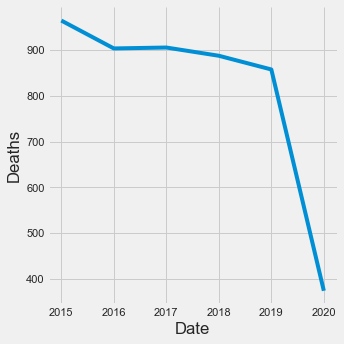

In [27]:
sns.relplot(x='Date',y='Deaths',kind='line',data=df2)

**The graph show that the number of shootings have gradually decreased over the years.**

## What percentage of people shot were mentally ill?

In [28]:
ill = len(df[df['signs_of_mental_illness']==True])/len(df[df['signs_of_mental_illness']==False])
print('{0:.2f}% people shot were mentally ill.'.format(ill*100))

29.09% people shot were mentally ill.


## Which city saw the highest number of shootings? 

Text(0.5, 0, 'Number of Shootings')

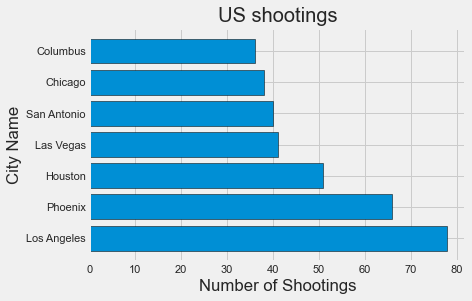

In [29]:
plt.style.use('fivethirtyeight')
count = df['city'].value_counts()[:7]
City = df['city'].value_counts().index[:7]
plt.barh(City,count, edgecolor='black')
plt.title("US shootings")
plt.ylabel("City Name")
plt.xlabel("Number of Shootings")

**Los Angeles saw the highest number of shootings.**

In [30]:
df.threat_level.value_counts()

attack          3160
other           1528
undetermined     207
Name: threat_level, dtype: int64

## What percentage of them were armed with guns?

In [31]:
df.arms_category.unique()

array(['Guns', 'Unarmed', 'Other unusual objects', 'Piercing objects',
       'Sharp objects', 'Unknown', 'Blunt instruments', 'Multiple',
       'Electrical devices', 'Hand tools', 'Vehicles', 'Explosives'],
      dtype=object)

Text(0, 0.5, 'Arms Used')

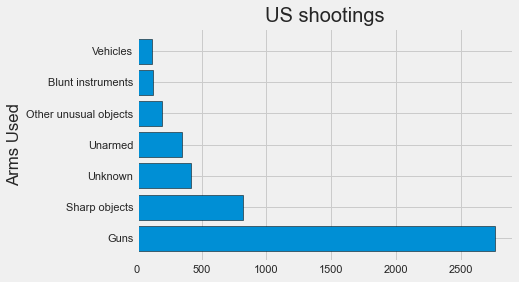

In [32]:
plt.style.use('fivethirtyeight')
count = df['arms_category'].value_counts()[:7]
Arms = df['arms_category'].value_counts().index[:7]
plt.barh(Arms,count, edgecolor='black')
plt.title("US shootings")
plt.ylabel("Arms Used")

## Number of people shot to death by the police in the United States from 2015 to 2020 by race.

In [33]:
df['Counts']=1

In [34]:
df4 = pd.DataFrame(df.groupby(['race',df['date'].dt.year]).Counts.sum())

In [35]:
df4.reset_index(inplace=True)

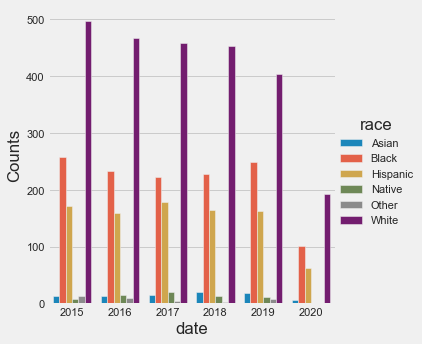

In [36]:
sns.catplot(x='date',y='Counts',hue='race',kind='bar',data=df4)